In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import cv2
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data_Y_total = np.loadtxt('Blood Cells/dataset-master/dataset-master/labels_cleaned.csv', str)

In [3]:
def construct_Y(data):
    
    n = len(data)
    num_features = 0
    
    for i in range(len(data[0])):
        if(data[0][i] == ","):
            num_features += 1
    
    Y_ints = np.zeros(n)
    Y_labels = np.zeros(n, dtype = 'str')
    for i in range(n):
        arr = data[i].split(",")
        Y_ints[i] = arr[1]
        Y_labels[i] = arr[2]
            
    return Y_ints.T, Y_labels
    

In [4]:
def contruct_data_array(data_Y_ints_pre, data_Y_labels_pre):
    L = len(data_Y_ints_pre)    
    img_array = []
    data_Y_ints = []
    data_Y_labels = []
    for index in range(L):
        i = data_Y_ints_pre[index]
        if(i < 10):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_0000{int(i)}.jpg'
        elif(i>=10 and i<100):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_000{int(i)}.jpg'
        elif(i>=100 and i<1000):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_00{int(i)}.jpg'

        img = cv2.imread(filename)
        if img is None:
            print(index)
            continue
        else:
            img_standard = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array.append(img_standard)
        data_Y_ints.append(data_Y_ints_pre[index])
        data_Y_labels.append(data_Y_labels_pre[index])
    return img_array, data_Y_ints, data_Y_labels

In [5]:
def convert_2_np(img_array, data_Y_labels):
    L = len(img_array)
    h = img_array[0].shape[0]
    w = img_array[0].shape[1]
    
    img_array_np     = np.zeros((L, h, w, 3), dtype = int)
    data_Y_labels_np = np.zeros((L), dtype = str)
    
    for i in range(L):
        img_array_np[i] = img_array[i]
        data_Y_labels_np[i] = data_Y_labels[i]
        
    return img_array_np, data_Y_labels_np

In [6]:
def split_train_test(data, num_train):
    
    train = data[0:num_train]
    test  = data[num_train:]
    
    return train, test

In [7]:
def one_hot_encoding(data):
    L = len(data)
    Y = np.zeros((L, 5))
    
    for i in range(L):
        if(data[i] == 'N'):
            Y[i][0] = 1
        elif(data[i] == 'B'):
            Y[i][1] = 1
        elif(data[i] == 'E'):
            Y[i][2] = 1
        elif(data[i] == 'M'):
            Y[i][3] = 1
        elif(data[i] == 'L'):
            Y[i][4] = 1
    
    return Y

In [8]:
def data_augmentation(X_data, Y_data, num_augment_list, type_array = 'list'):
    
    if(type_array == 'list'):
        
        L = len(X_data)
        for i in range(L):

            img   = X_data[i]
            
            if(Y_data[i] == 'N'):
                num_augment = num_augment_list[0]
            elif(Y_data[i] == 'E'):
                num_augment = num_augment_list[1]
            elif(Y_data[i] == 'L'):
                num_augment = num_augment_list[2]    
            elif(Y_data[i] == 'M'):
                num_augment = num_augment_list[3]
            elif(Y_data[i] == 'B'):
                num_augment = num_augment_list[4]
                
            for j in range(num_augment):
                new_img1 = layers.RandomFlip('horizontal_and_vertical')(img)
                new_img  = layers.RandomRotation(1)(new_img1)

                X_data.append(new_img)
                Y_data.append(Y_data[i])

                print(i, j)
        return X_data, Y_data
    else:
        L = len(X_data)
        h = X_data[0].shape[0]
        w = X_data[0].shape[1]

        X_data_new     = np.zeros((L + (L*num_augment) , h, w, 3), dtype = int)
        Y_data_new     = np.zeros(L + (L*num_augment) , dtype = str)

        for i in range(L):

            img      = X_data[i]
            X_data_new[i] = X_data[i]
            Y_data_new[i] = Y_data[i]
            
            if(Y_data[i] == 'N'):
                num_augment = num_augment_list[0]
            elif(Y_data[i] == 'E'):
                num_augment = num_augment_list[1]
            elif(Y_data[i] == 'L'):
                num_augment = num_augment_list[2]    
            elif(Y_data[i] == 'M'):
                num_augment = num_augment_list[3]
            elif(Y_data[i] == 'B'):
                num_augment = num_augment_list[4]

            for j in range(num_augment):
                new_img1 = layers.RandomFlip('horizontal_and_vertical')(img)
                new_img  = layers.RandomRotation(1)(new_img1)
    #             print(new_img.shape, X_data_new[i].shape)

                index = i + L + j + (i * (num_augment-1))

    #             if(i>0):
    #                 index = index - 1

                X_data_new[index]  = new_img
                Y_data_new[index]  = Y_data[i]

                print(index , i, j)
                
        return X_data_new, Y_data_new

In [9]:
L = len(data_Y_total)

In [10]:
data_Y_ints_pre, data_Y_labels_pre = construct_Y(data_Y_total)

In [11]:
img_array, data_Y_ints, data_Y_labels = contruct_data_array(data_Y_ints_pre, data_Y_labels_pre)

98
173
237


In [12]:
num_test_pre = pd.Index(data_Y_labels)
print(num_test_pre.value_counts())

N    206
E     88
L     33
M     20
B      3
Name: count, dtype: int64


In [13]:
num_augment_list = [0, 0, 20, 30, 300]
img_array_augment, data_Y_labels_augment = data_augmentation(img_array, data_Y_labels, num_augment_list, type_array = 'list')

8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107
8 108
8 109
8 110
8 111
8 112
8 113
8 114
8 115
8 116
8 117
8 118
8 119
8 120
8 121
8 122
8 123
8 124
8 125
8 126
8 127
8 128
8 129
8 130
8 131
8 132
8 133
8 134
8 135
8 136
8 137
8 138
8 139
8 140
8 141
8 142
8 143
8 144
8 145
8 146
8 147
8 148
8 149
8 150
8 151
8 152
8 153
8 154
8 155
8 156
8 157
8 158
8 159
8 160
8 161
8 162
8 163
8 164
8 165
8 166
8 167
8 168
8 169
8 170
8 171
8 172
8 173
8 174
8 175
8 176
8 177
8 178
8 179
8 180
8 181
8 182
8 183
8 184


139 182
139 183
139 184
139 185
139 186
139 187
139 188
139 189
139 190
139 191
139 192
139 193
139 194
139 195
139 196
139 197
139 198
139 199
139 200
139 201
139 202
139 203
139 204
139 205
139 206
139 207
139 208
139 209
139 210
139 211
139 212
139 213
139 214
139 215
139 216
139 217
139 218
139 219
139 220
139 221
139 222
139 223
139 224
139 225
139 226
139 227
139 228
139 229
139 230
139 231
139 232
139 233
139 234
139 235
139 236
139 237
139 238
139 239
139 240
139 241
139 242
139 243
139 244
139 245
139 246
139 247
139 248
139 249
139 250
139 251
139 252
139 253
139 254
139 255
139 256
139 257
139 258
139 259
139 260
139 261
139 262
139 263
139 264
139 265
139 266
139 267
139 268
139 269
139 270
139 271
139 272
139 273
139 274
139 275
139 276
139 277
139 278
139 279
139 280
139 281
139 282
139 283
139 284
139 285
139 286
139 287
139 288
139 289
139 290
139 291
139 292
139 293
139 294
139 295
139 296
139 297
139 298
139 299
153 0
153 1
153 2
153 3
153 4
153 5
153 6
153 7
153 8
15

In [14]:
img_array_np, data_Y_labels_np = convert_2_np(img_array_augment, data_Y_labels_augment)

In [15]:
img_array_np.shape, data_Y_labels_np.shape

((2510, 480, 640, 3), (2510,))

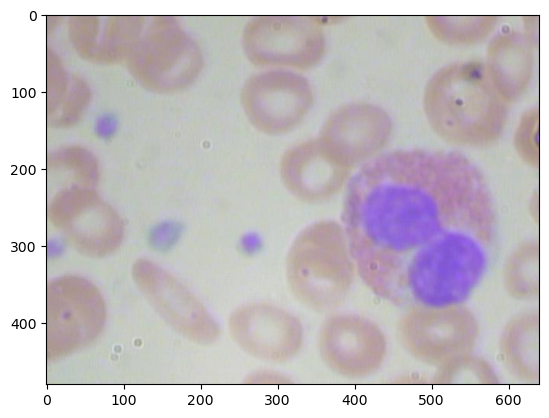

In [16]:
plt.imshow(img_array_np[349])

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(img_array_np, data_Y_labels_np, train_size = .8, random_state = 50)

In [18]:
import pandas as pd

num_train = pd.Index(train_Y)
num_test = pd.Index(test_Y)
print(num_train.value_counts())
print(num_test.value_counts())

B    715
L    566
M    506
N    155
E     66
Name: count, dtype: int64
B    188
L    127
M    114
N     51
E     22
Name: count, dtype: int64


In [19]:
train_Y_final = one_hot_encoding(train_Y)
test_Y_final = one_hot_encoding(test_Y)

In [20]:
def cnn(initial_shape):
    
    initial_image = tf.keras.Input(initial_shape)
    
    Conv_1  = tfl.Conv2D(11, (5,5), strides = 5, padding = 'same')(initial_image)
    Drop_1  = tfl.Dropout(.1)(Conv_1)
    Relu_1  = tfl.ReLU()(Drop_1)
    MP2D_1  = tfl.MaxPool2D((7,7), strides = 5)(Relu_1)
    
    Conv_2  = tfl.Conv2D(6, (4,4), strides = 2, padding = 'same')(MP2D_1)
    Drop_2  = tfl.Dropout(.1)(Conv_2)
    Relu_2  = tfl.ReLU()(Drop_2)
    MP2D_2  = tfl.MaxPool2D((3,3), strides = 3)(Relu_2)
    
    Conv_3  = tfl.Conv2D(4, (3,3), strides = 1, padding = 'same')(MP2D_2)
    Drop_3  = tfl.Dropout(.1)(Conv_3)
    Relu_3  = tfl.ReLU()(Drop_3)
    MP2D_3  = tfl.MaxPool2D((3,3), strides = 1)(Relu_3)
    
    flat  = tfl.Flatten()(MP2D_3)
    dense = tfl.Dense(5,activation = 'softmax')(flat)
    
    model = tf.keras.Model(inputs = initial_image, outputs = dense)
    
    return model

In [21]:
convolutional_mod = cnn(train_X[0].shape)
convolutional_mod.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
convolutional_mod.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 480, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 128, 11)         │             836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96, 128, 11)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 96, 128, 11)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 18, 25, 11)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 13, 6)            │           1,062 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 13, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 9, 13, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 4, 6)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 4, 4)             │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 3, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 2, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,163 (8.45 KB)

 Trainable params: 2,163 (8.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
print(train_X.shape, train_Y_final.shape)
print(test_X.shape, test_Y_final.shape)

(2008, 480, 640, 3) (2008, 5)
(502, 480, 640, 3) (502, 5)


In [23]:
train_set = tf.data.Dataset.from_tensor_slices((train_X, train_Y_final)).batch(32)

In [24]:
test_set = tf.data.Dataset.from_tensor_slices((test_X, test_Y_final)).batch(32)

In [25]:
hist   = convolutional_mod.fit(train_set, epochs = 500, validation_data = test_set)

Epoch 1/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.2100 - loss: 51.4533 - val_accuracy: 0.3466 - val_loss: 1.7153
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.3260 - loss: 1.6717 - val_accuracy: 0.3725 - val_loss: 1.4425
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.3780 - loss: 1.4192 - val_accuracy: 0.3944 - val_loss: 1.4105
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.3842 - loss: 1.4035 - val_accuracy: 0.3904 - val_loss: 1.4019
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.3956 - loss: 1.3772 - val_accuracy: 0.4024 - val_loss: 1.3952
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.3865 - loss: 1.3881 - val_accuracy: 0.4363 - val_loss: 1.3838
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.4043 - loss: 1.3598 - val_accuracy: 0.4462 - val_loss: 1.3751
Epoch 8/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.4259 - loss: 1.3410 - val_ac

Epoch 51/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.6329 - loss: 0.9762 - val_accuracy: 0.6454 - val_loss: 0.9844
Epoch 52/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.6489 - loss: 0.9454 - val_accuracy: 0.6016 - val_loss: 1.0450
Epoch 53/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.6348 - loss: 0.9651 - val_accuracy: 0.6056 - val_loss: 1.0207
Epoch 54/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.6468 - loss: 0.9032 - val_accuracy: 0.6135 - val_loss: 1.0379
Epoch 55/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.6439 - loss: 0.9442 - val_accuracy: 0.6295 - val_loss: 0.9922
Epoch 56/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5958 - loss: 1.0219 - val_accuracy: 0.6574 - val_loss: 0.9697
Epoch 57/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6682 - loss: 0.9091 - val_accuracy: 0.6394 - val_loss: 0.9853
Epoch 58/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6434 - loss: 0.9191

Epoch 101/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7106 - loss: 0.8212 - val_accuracy: 0.7052 - val_loss: 0.8454
Epoch 102/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.7358 - loss: 0.7688 - val_accuracy: 0.6853 - val_loss: 0.9126
Epoch 103/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.7094 - loss: 0.8188 - val_accuracy: 0.7032 - val_loss: 0.8358
Epoch 104/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.7352 - loss: 0.7699 - val_accuracy: 0.7112 - val_loss: 0.8167
Epoch 105/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7349 - loss: 0.7686 - val_accuracy: 0.7112 - val_loss: 0.8368
Epoch 106/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.7274 - loss: 0.7913 - val_accuracy: 0.7052 - val_loss: 0.8790
Epoch 107/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.7184 - loss: 0.7978 - val_accuracy: 0.7171 - val_loss: 0.8416
Epoch 108/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7370 - loss

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7624 - loss: 0.6868 - val_accuracy: 0.7510 - val_loss: 0.7807
Epoch 151/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7575 - loss: 0.6863 - val_accuracy: 0.7052 - val_loss: 0.8530
Epoch 152/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7323 - loss: 0.7409 - val_accuracy: 0.7311 - val_loss: 0.7832
Epoch 153/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.7579 - loss: 0.7039 - val_accuracy: 0.7271 - val_loss: 0.7761
Epoch 154/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.7469 - loss: 0.6885 - val_accuracy: 0.7171 - val_loss: 0.7802
Epoch 155/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7330 - loss: 0.7398 - val_accuracy: 0.7390 - val_loss: 0.7859
Epoch 156/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.7625 - loss: 0.6766 - val_accuracy: 0.7271 - val_loss: 0.8008
Epoch 157/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7731 - loss: 0.6734 - val_a

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7490 - loss: 0.6875 - val_accuracy: 0.7351 - val_loss: 0.7516
Epoch 200/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7713 - loss: 0.6527 - val_accuracy: 0.7669 - val_loss: 0.7221
Epoch 201/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7854 - loss: 0.6126 - val_accuracy: 0.7649 - val_loss: 0.6904
Epoch 202/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7596 - loss: 0.6462 - val_accuracy: 0.7410 - val_loss: 0.7369
Epoch 203/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7703 - loss: 0.6363 - val_accuracy: 0.7390 - val_loss: 0.7316
Epoch 204/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7597 - loss: 0.6798 - val_accuracy: 0.7610 - val_loss: 0.7346
Epoch 205/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7644 - loss: 0.6389 - val_accuracy: 0.7669 - val_loss: 0.7134
Epoch 206/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7719 - loss: 0.6448 - val_ac

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7666 - loss: 0.6232 - val_accuracy: 0.7829 - val_loss: 0.6645
Epoch 249/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7691 - loss: 0.6108 - val_accuracy: 0.7151 - val_loss: 0.7596
Epoch 250/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7351 - loss: 0.7315 - val_accuracy: 0.7649 - val_loss: 0.6891
Epoch 251/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7729 - loss: 0.6124 - val_accuracy: 0.7749 - val_loss: 0.6734
Epoch 252/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7712 - loss: 0.6027 - val_accuracy: 0.7669 - val_loss: 0.6621
Epoch 253/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7562 - loss: 0.6674 - val_accuracy: 0.7410 - val_loss: 0.7275
Epoch 254/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7834 - loss: 0.6061 - val_accuracy: 0.7709 - val_loss: 0.6905
Epoch 255/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7679 - loss: 0.6123 - val_ac

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7839 - loss: 0.5744 - val_accuracy: 0.7729 - val_loss: 0.6563
Epoch 298/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7919 - loss: 0.5677 - val_accuracy: 0.7789 - val_loss: 0.6410
Epoch 299/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7991 - loss: 0.5667 - val_accuracy: 0.7829 - val_loss: 0.6574
Epoch 300/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7789 - loss: 0.5821 - val_accuracy: 0.7390 - val_loss: 0.7408
Epoch 301/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7791 - loss: 0.5793 - val_accuracy: 0.7769 - val_loss: 0.6495
Epoch 302/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7875 - loss: 0.5494 - val_accuracy: 0.7709 - val_loss: 0.6580
Epoch 303/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7966 - loss: 0.5426 - val_accuracy: 0.7689 - val_loss: 0.6731
Epoch 304/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7995 - loss: 0.5398 - val_

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7694 - loss: 0.5777 - val_accuracy: 0.7570 - val_loss: 0.6623
Epoch 347/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7982 - loss: 0.5467 - val_accuracy: 0.7390 - val_loss: 0.7449
Epoch 348/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7738 - loss: 0.5786 - val_accuracy: 0.7789 - val_loss: 0.6712
Epoch 349/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7902 - loss: 0.5660 - val_accuracy: 0.7709 - val_loss: 0.6412
Epoch 350/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8006 - loss: 0.5355 - val_accuracy: 0.7669 - val_loss: 0.6449
Epoch 351/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7876 - loss: 0.5806 - val_accuracy: 0.7669 - val_loss: 0.6322
Epoch 352/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7878 - loss: 0.5845 - val_accuracy: 0.7669 - val_loss: 0.6764
Epoch 353/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8146 - loss: 0.5189 - val_ac

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8061 - loss: 0.5146 - val_accuracy: 0.7709 - val_loss: 0.6559
Epoch 396/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8106 - loss: 0.5302 - val_accuracy: 0.7171 - val_loss: 0.7735
Epoch 397/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7928 - loss: 0.5549 - val_accuracy: 0.7470 - val_loss: 0.6830
Epoch 398/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8030 - loss: 0.5448 - val_accuracy: 0.7729 - val_loss: 0.6667
Epoch 399/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7965 - loss: 0.5340 - val_accuracy: 0.7769 - val_loss: 0.6395
Epoch 400/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7717 - loss: 0.5977 - val_accuracy: 0.7709 - val_loss: 0.6606
Epoch 401/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8145 - loss: 0.5156 - val_accuracy: 0.7769 - val_loss: 0.6315
Epoch 402/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8135 - loss: 0.5029 - val_ac

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8023 - loss: 0.5368 - val_accuracy: 0.7829 - val_loss: 0.6432
Epoch 445/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8065 - loss: 0.5058 - val_accuracy: 0.7550 - val_loss: 0.7011
Epoch 446/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8020 - loss: 0.5541 - val_accuracy: 0.7490 - val_loss: 0.7050
Epoch 447/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8021 - loss: 0.5493 - val_accuracy: 0.7251 - val_loss: 0.7331
Epoch 448/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8139 - loss: 0.5109 - val_accuracy: 0.7649 - val_loss: 0.6951
Epoch 449/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7943 - loss: 0.5558 - val_accuracy: 0.7490 - val_loss: 0.6925
Epoch 450/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.8034 - loss: 0.5173 - val_accuracy: 0.7610 - val_loss: 0.6923
Epoch 451/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7838 - loss: 0.5354 - val_a

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.8063 - loss: 0.5211 - val_accuracy: 0.7470 - val_loss: 0.6933
Epoch 494/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.7970 - loss: 0.5428 - val_accuracy: 0.7689 - val_loss: 0.6437
Epoch 495/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8133 - loss: 0.5191 - val_accuracy: 0.7590 - val_loss: 0.7009
Epoch 496/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7910 - loss: 0.5470 - val_accuracy: 0.7092 - val_loss: 0.7696
Epoch 497/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8022 - loss: 0.5259 - val_accuracy: 0.7769 - val_loss: 0.6716
Epoch 498/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.8152 - loss: 0.4963 - val_accuracy: 0.7769 - val_loss: 0.6812
Epoch 499/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8015 - loss: 0.5068 - val_accuracy: 0.7709 - val_loss: 0.6467
Epoch 500/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8285 - loss: 0.4823 - val_acc

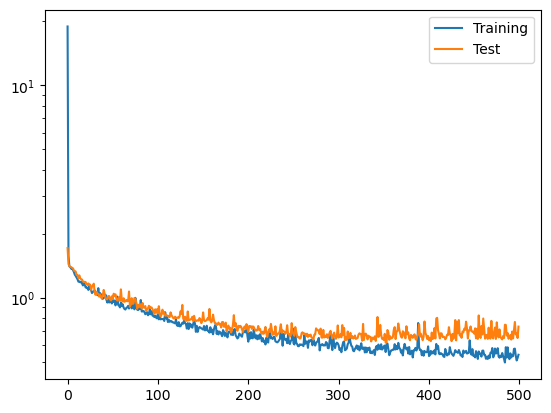

In [28]:
plt.yscale('log')
plt.plot(hist.history['loss'], label = 'Training')
plt.plot(hist.history['val_loss'], label = 'Test')
plt.legend()

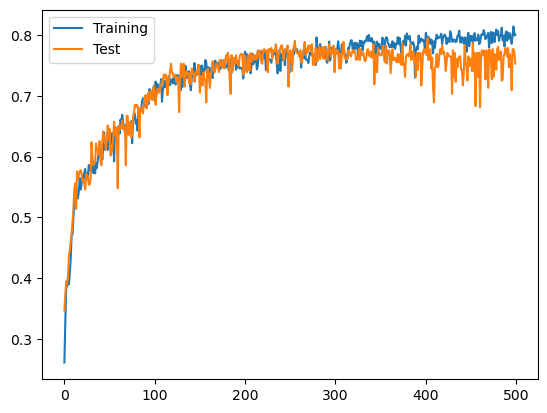

In [27]:
plt.plot(hist.history['accuracy'], label = 'Training')
plt.plot(hist.history['val_accuracy'], label = 'Test')
plt.legend()

Special thanks to DeepLearning.ai for the coursework/syntax help on the CNN structure codes.

Retrieved from DeepLearning.AI (2024, December 25). 

Convolution_model_Application. Retrieved from C4_W1 Graded Assignment 2 in the Deep Learning Specialization

Code for cv2 adapted from: https://www.geeksforgeeks.org/python-opencv-cv2-imshow-method/.

Code for data augmentation adapted from: https://www.geeksforgeeks.org/apply-a-2d-convolution-operation-in-pytorch/ and
https://www.tensorflow.org/tutorials/images/data_augmentation

Thanks to Google AI for help with pandas.